# Checking Hyperparameter Configurations after Hyperparameter Optimization (HPO) - FD003

***

In [1]:
# importing modules
import pandas as pd
import pygmo as pg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing HPO results (keeping only up to 300 function evaluations)
configs = pd.read_csv('./Harmonic_Mean_Results/dataset_3/results_harmonic_mean_dataset_3_11_2')

In [3]:
configs.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,3.890674e+12,6.880808e+10,-0.000313,0.341741,4.790454e+07,6.765362e+06,-0.020351,0.346099,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."
1,6.412787e+01,4.600507e+01,0.393230,21.150108,5.071936e+01,4.162709e+01,0.420759,21.546997,"{""num_rec"": 1, ""max_time"": 37, ""neuron_0"": 13,..."
2,9.104768e+00,6.402071e+00,0.894290,5.716380,8.152480e+00,5.686495e+00,0.864017,6.193633,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 41,..."
3,1.165506e+01,9.404483e+00,0.832079,3.404232,1.077005e+01,8.785693e+00,0.745412,3.141193,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
4,6.368504e+01,4.456621e+01,0.303820,28.210373,4.602140e+01,3.699266e+01,0.464500,28.688482,"{""num_rec"": 1, ""max_time"": 29, ""neuron_0"": 38,..."


In [10]:
# Some cfgs were infeasible
configs.shape

(252, 9)

In [11]:
# Scaling data to calculate the hypervolume indicator (HVI)
scaler = MinMaxScaler()
norm_cfgs = scaler.fit_transform(configs[['rmse_test', 'uncertainty_test']])

In [12]:
hyper_volume =[]
for i in range(norm_cfgs.shape[0]):
    hv = pg.hypervolume(norm_cfgs[:i+1])
    hyper_volume.append(hv.compute(ref_point=[1.1,1.1]))

hyper_volume = np.array(hyper_volume)

In [13]:
# checking also bi-objective results to combine them later on
configs_bi = pd.read_csv('./GRU/Final_experiments/dataset_3/results_no_cv_HO_26_12_MO').iloc[:300]

In [14]:
configs_bi.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,2.037194e+01,1.776858e+01,0.493754,10.511260,2.064205e+01,1.819137e+01,0.316019,11.039882,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 62,..."
1,7.578074e+01,5.648686e+01,-2.551426,103.418945,5.120919e+01,4.088745e+01,-1.308507,17.355362,"{""num_rec"": 1, ""max_time"": 31, ""neuron_0"": 24,..."
2,1.611320e+02,1.277127e+02,-42.817646,0.753569,1.314109e+02,1.089698e+02,-118.790413,0.767642,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."
3,5.651538e+05,1.787017e+04,-0.000990,0.341459,3.520836e+04,6.305594e+03,-0.032284,0.345109,"{""num_rec"": 2, ""max_time"": 49, ""neuron_0"": 41,..."
4,2.924472e+12,2.785623e+10,-0.000091,0.397280,4.833739e+08,6.460028e+07,-0.018186,0.399527,"{""num_rec"": 1, ""max_time"": 21, ""neuron_0"": 52,..."


In [15]:
configs_bi.shape

(300, 9)

In [16]:
# Scaling data to calculate the hypervolume indicator (HVI)
scaler_bi = MinMaxScaler()
norm_cfgs_bi = scaler_bi.fit_transform(configs_bi[['rmse_test', 'uncertainty_test']])

In [17]:
hyper_volume_bi =[]
for i in range(norm_cfgs_bi.shape[0]):
    hv_bi = pg.hypervolume(norm_cfgs_bi[:i+1])
    hyper_volume_bi.append(hv_bi.compute(ref_point=[1.1,1.1]))

hyper_volume_bi = np.array(hyper_volume_bi)

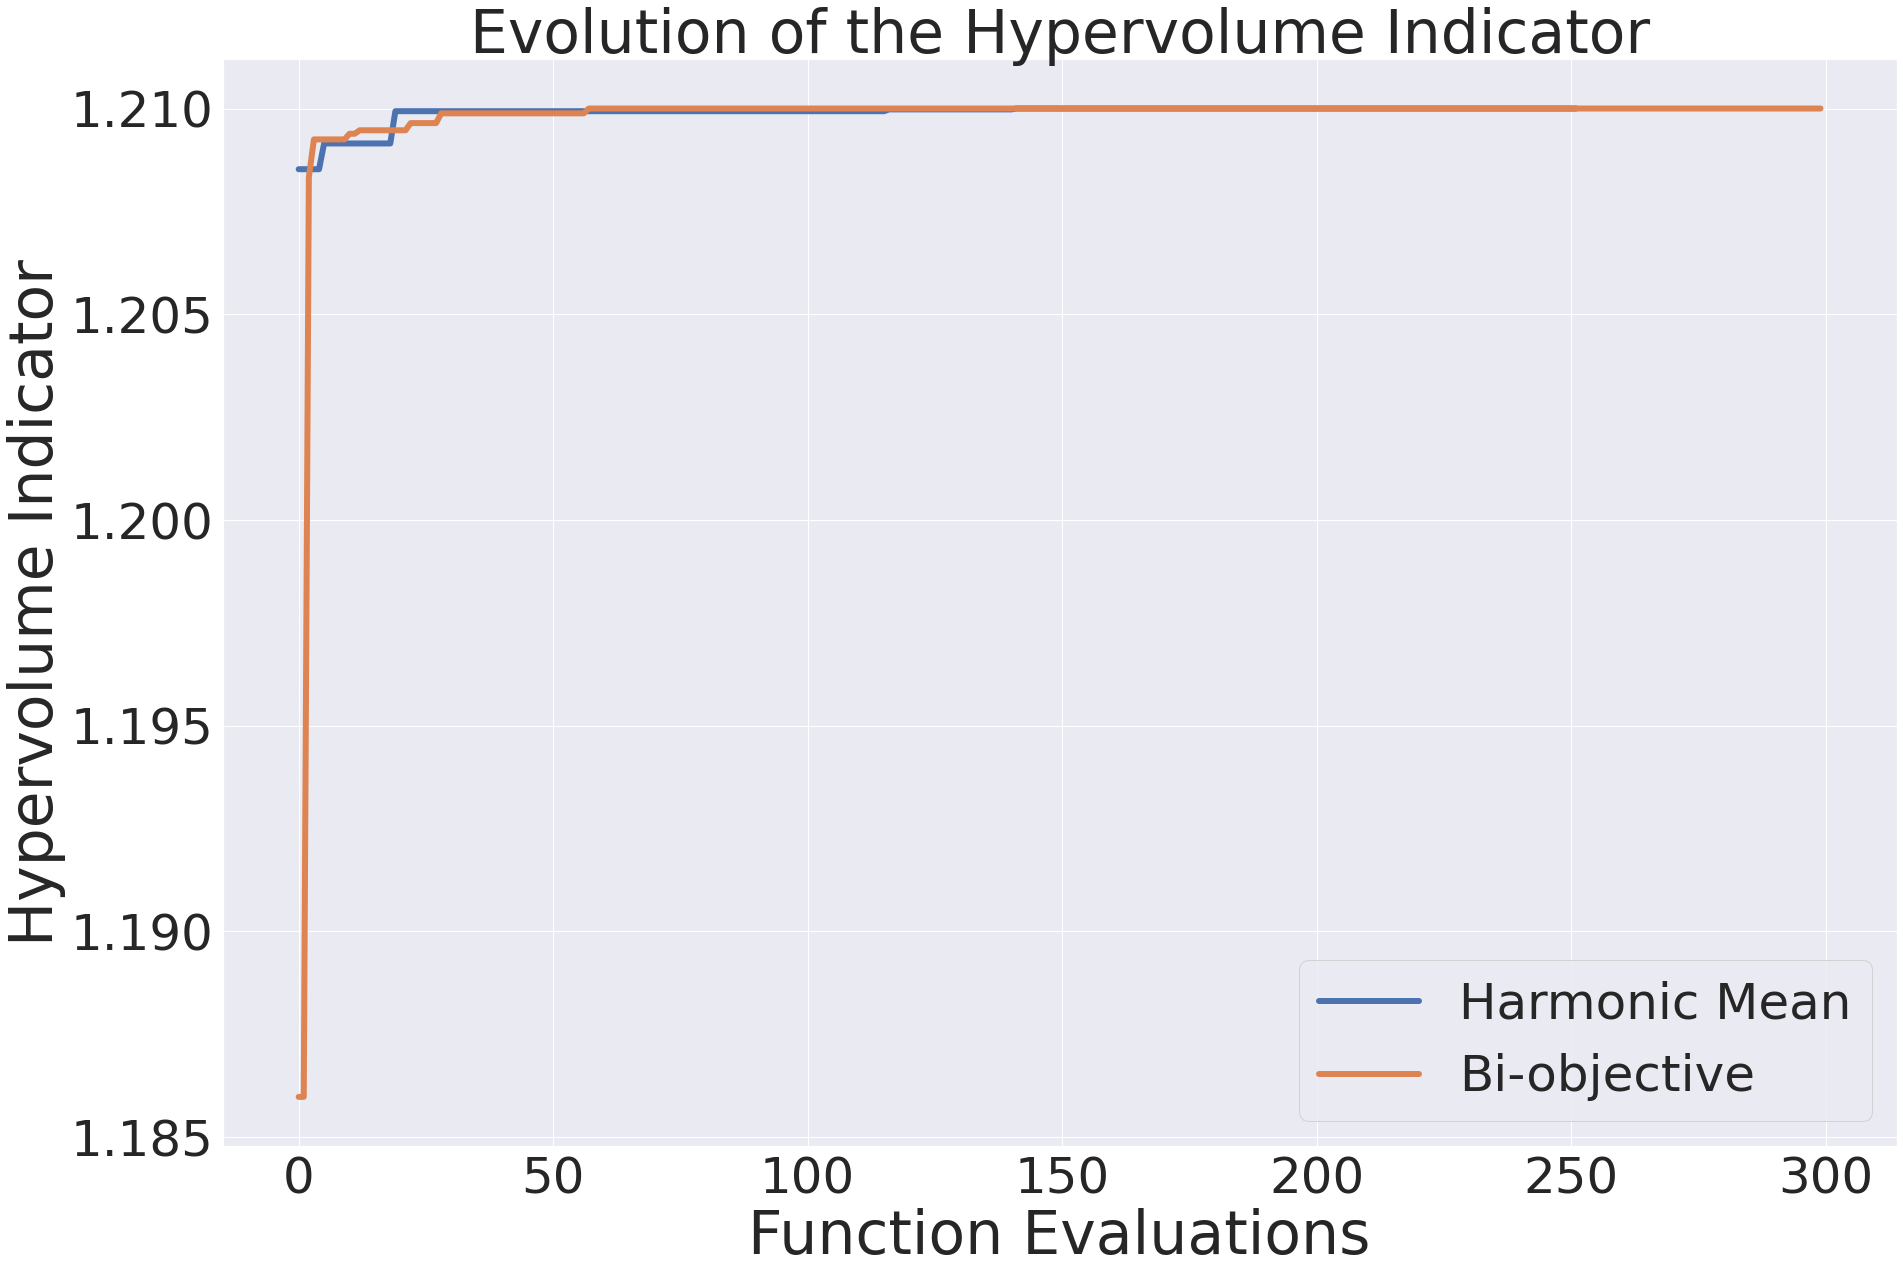

In [18]:
plt.figure(figsize=(30,20))
plt.plot(np.arange(hyper_volume.shape[0]), hyper_volume, label='Harmonic Mean', linewidth=6) 
plt.plot(np.arange(hyper_volume_bi.shape[0]), hyper_volume_bi, label='Bi-objective', linewidth=6)
plt.xlabel('Function Evaluations', fontsize=60)
plt.ylabel('Hypervolume Indicator', fontsize=60)
plt.title('Evolution of the Hypervolume Indicator', fontsize=60)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.legend(prop={'size': 50}) 

# plt.savefig('./paper_figures/cmapss_3_HM_vs_BI_HVI.pdf', format='pdf')
 



In [20]:
# Calculating the Pareto front of the signle-objective method
pareto_index = pg.non_dominated_front_2d(configs[['rmse_test', 'uncertainty_test']]) 

In [21]:
pareto_configs = configs.iloc[pareto_index] 

In [22]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
73,8.705719,4.697611,0.931783,16.187489,6.071040,3.340030,0.949876,17.714993,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 71,..."
28,8.247755,3.313368,0.931689,9.174892,7.125114,2.536192,0.917190,10.134741,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,..."
2,9.104768,6.402071,0.894290,5.716380,8.152480,5.686495,0.864017,6.193633,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 41,..."
3,11.655065,9.404483,0.832079,3.404232,10.770049,8.785693,0.745412,3.141193,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
52,31.166383,23.016408,0.500469,0.173339,23.271972,18.439489,0.502649,0.168689,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 11,..."
184,37.898247,31.381972,-0.263566,0.103453,39.599492,33.886961,-0.728891,0.102074,"{""num_rec"": 2, ""max_time"": 44, ""neuron_0"": 53,..."
141,54.083114,49.531087,-9.328154,0.077244,59.077583,55.816885,-17.761271,0.058012,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 23,..."


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

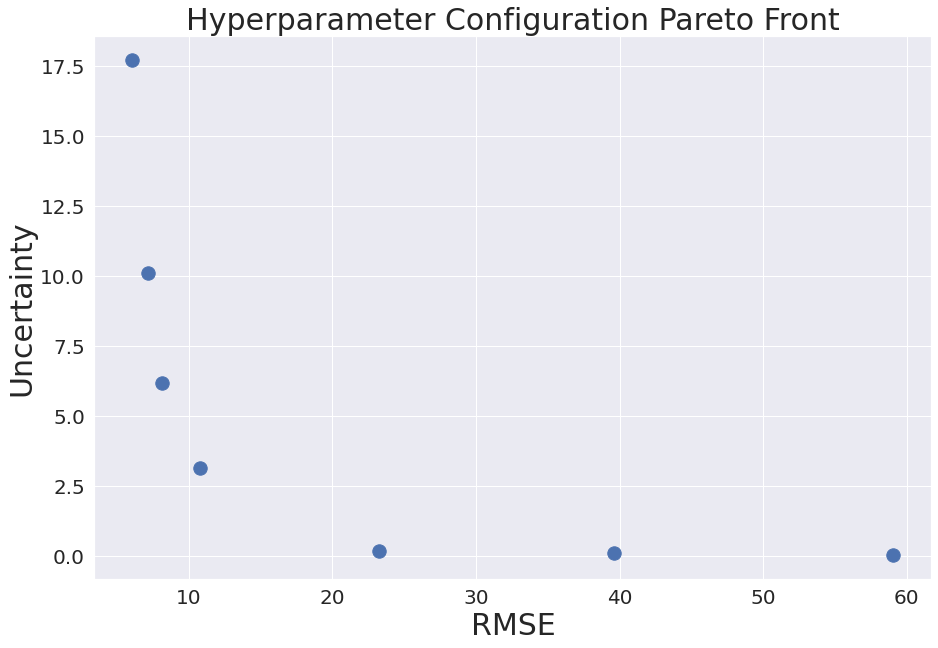

In [23]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
plt.scatter(x, y, s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configuration Pareto Front', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

***

Creating Figure 9 from paper

In [24]:
# Loading results on dedicated test set.
# Models have been trained on the entirety of the training data with the configurations of the Pareto front.
# The results have been saved in the file that is loaded below.
Results_retake = pd.read_csv('./Harmonic_Mean_Results/dataset_3/test/Results_retake')

Combining the Results with the Pareto front.

In [27]:
pareto_configs

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
73,8.705719,4.697611,0.931783,16.187489,6.071040,3.340030,0.949876,17.714993,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 71,..."
28,8.247755,3.313368,0.931689,9.174892,7.125114,2.536192,0.917190,10.134741,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,..."
2,9.104768,6.402071,0.894290,5.716380,8.152480,5.686495,0.864017,6.193633,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 41,..."
3,11.655065,9.404483,0.832079,3.404232,10.770049,8.785693,0.745412,3.141193,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
52,31.166383,23.016408,0.500469,0.173339,23.271972,18.439489,0.502649,0.168689,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 11,..."
184,37.898247,31.381972,-0.263566,0.103453,39.599492,33.886961,-0.728891,0.102074,"{""num_rec"": 2, ""max_time"": 44, ""neuron_0"": 53,..."
141,54.083114,49.531087,-9.328154,0.077244,59.077583,55.816885,-17.761271,0.058012,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 23,..."


In [28]:
pareto_configs.reset_index(drop=True, inplace=True) 

In [29]:
Results_retake['rank'] = pareto_configs.index 

In [30]:
Results_retake

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg,rank
0,8.770561,4.456838,0.930337,16.655611,28.068274,22.707415,0.420575,18.532873,"{""num_rec"": 2, ""max_time"": 47, ""neuron_0"": 71,...",0
1,7.759990,3.398297,0.937946,15.438107,33.882566,27.040926,0.044766,16.506889,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 53,...",1
2,8.623694,4.951026,0.918128,4.910240,29.448620,23.915036,0.198905,5.614517,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 41,...",2
3,8.232460,4.928956,0.937207,6.354715,32.833080,26.366128,0.170475,7.271165,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,...",3
4,29.188243,23.441410,0.316325,0.169659,23.816491,18.140929,0.490321,0.185458,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 11,...",4
5,49.005909,43.821229,-2.755415,0.141048,38.513077,29.638927,-2.243840,0.152991,"{""num_rec"": 2, ""max_time"": 44, ""neuron_0"": 53,...",5
6,57.065151,52.485466,-16.178600,0.108415,50.761456,41.263529,-12.616332,0.144880,"{""num_rec"": 1, ""max_time"": 20, ""neuron_0"": 23,...",6


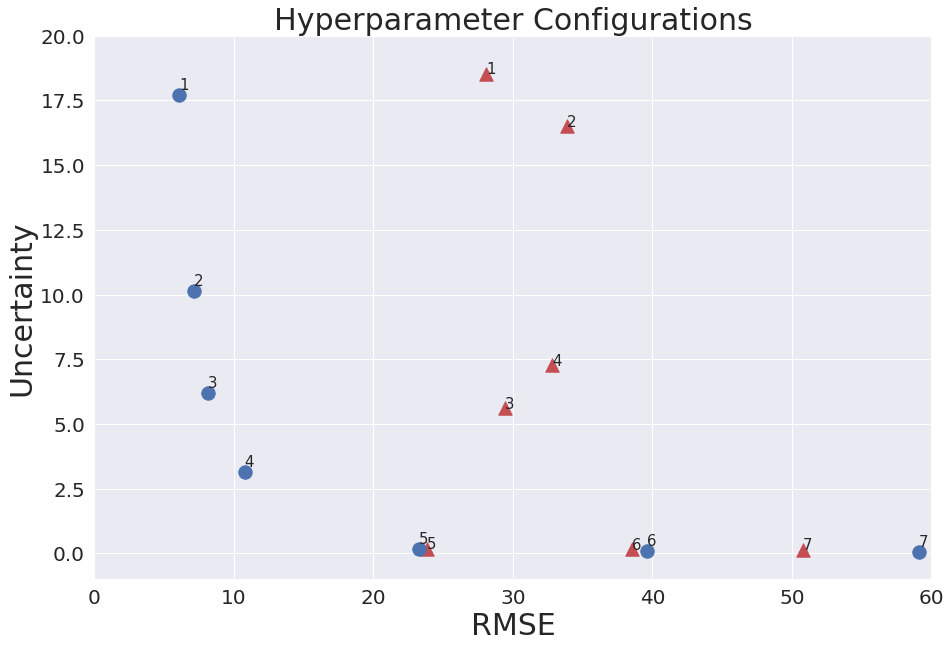

In [31]:
x = Results_retake['rmse_test'].values
y = Results_retake['uncertainty_test'].values
x_prime = pareto_configs['rmse_test'].values
y_prime = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
# plt.scatter(x[0], y[0], s=400, facecolors='red')
plt.scatter(x, y, marker='^',s=180, c='r')
plt.scatter(x_prime, y_prime,s=180)
plt.xlabel('RMSE', fontsize=30)
plt.ylabel('Uncertainty', fontsize=30)
plt.title('Hyperparameter Configurations', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0,60)
plt.ylim(-1,20)

for i, txt in enumerate(Results_retake['rank']):
    plt.annotate(txt+1, (x[i], y[i]), fontsize=15)

for i, txt in enumerate(pareto_configs.index):
    plt.annotate(txt+1, (x_prime[i], y_prime[i]+0.2), fontsize=15)

# plt.savefig('./paper_figures/cmapss_3_obj_space_harmonic_mean_RETAKE.pdf', format='pdf')
